In [1]:
import experiment
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
import torch
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [2]:
default_exp = experiment.Experiment(name="googlenet")


Loading googlenet_exp
dataset size:  (342, 15)
min label:  3.3783979009481375
max label:  4.646599751720373
Using re-weighting: [SQRT_INV]
dataset size:  (793, 16)
min label:  1.1760912590556813
max label:  10.635483746814913
Using re-weighting: [SQRT_INV]
Using LDS: [GAUSSIAN] (10/2)
[6. 4.]
dataset size:  (793, 16)
min label:  1.1760912590556813
max label:  10.635483746814913
Using re-weighting: [SQRT_INV]
Using LDS: [GAUSSIAN] (10/2)
[6. 4.]
dataset size:  (793, 16)
min label:  1.1760912590556813
max label:  10.635483746814913
Using re-weighting: [SQRT_INV]
Using LDS: [GAUSSIAN] (10/2)
[6. 4.]
dataset size:  (793, 16)
min label:  1.1760912590556813
max label:  10.635483746814913
Using re-weighting: [SQRT_INV]
Using LDS: [GAUSSIAN] (10/2)
[6. 4.]
dataset size:  (793, 16)
min label:  1.1760912590556813
max label:  10.635483746814913
Using re-weighting: [SQRT_INV]
Using LDS: [GAUSSIAN] (10/2)
[6. 4.]
GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), strid

<Figure size 432x288 with 0 Axes>

In [3]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_parameters(default_exp.model)

9932963

In [3]:
default_exp.train()


Now running epoch 0


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.23it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.76it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 5.135174434489408, MSE = 28.25843749558889
Validation losses: MAE = 5.049601082639805, MSE = 27.345629707364782
Now running epoch 1


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:04,  4.50it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  4.05it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 5.043526278593013, MSE = 27.25591155641195
Validation losses: MAE = 4.868784952818007, MSE = 25.55336797477394
Now running epoch 2


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  4.00it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  4.06it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 4.961081483952629, MSE = 26.3934098146214
Validation losses: MAE = 4.8939940978175915, MSE = 25.779177004120957
Now running epoch 3


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.95it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  3.88it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 4.863886082301831, MSE = 25.43628862435398
Validation losses: MAE = 4.843276325954431, MSE = 25.531543136312116
Now running epoch 4


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.89it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  4.30it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 4.778231600284651, MSE = 24.74887097685953
Validation losses: MAE = 4.766518178804585, MSE = 25.092710399748707
Now running epoch 5


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:04,  4.64it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  4.65it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 4.711873438641868, MSE = 24.149893755191304
Validation losses: MAE = 4.392543486188243, MSE = 22.484951336120247
Now running epoch 6


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.21it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.72it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 4.625867426617985, MSE = 23.65234434978545
Validation losses: MAE = 4.451176127484371, MSE = 22.01899812656775
Now running epoch 7


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.46it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  4.06it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 4.534010281561492, MSE = 22.89194133210535
Validation losses: MAE = 5.222271421212605, MSE = 30.338475980495392
Now running epoch 8


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:04,  4.23it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  3.99it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 4.445529907433337, MSE = 22.17526151178339
Validation losses: MAE = 4.8728064358549315, MSE = 27.566359525835125
Now running epoch 9


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.89it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.69it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 4.3993087967413915, MSE = 22.158040046307963
Validation losses: MAE = 5.3644002869735585, MSE = 32.82358987595009
Now running epoch 10


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.81it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  4.20it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 4.302612770993826, MSE = 21.676571094944347
Validation losses: MAE = 4.795639867547154, MSE = 25.838442241039026
Now running epoch 11


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.25it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.25it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 4.18968347591698, MSE = 20.2352220543555
Validation losses: MAE = 4.183203135060559, MSE = 21.705089749580726
Now running epoch 12


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.29it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  3.86it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 4.106043771018558, MSE = 20.057197516633924
Validation losses: MAE = 3.782385187406736, MSE = 19.412121587127682
Now running epoch 13


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.21it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.54it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 4.055175907515423, MSE = 19.708182077539462
Validation losses: MAE = 4.049989009155192, MSE = 22.05054832543418
Now running epoch 14


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:04,  4.25it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  4.04it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 4.35296625263751, MSE = 22.548727033567758
Validation losses: MAE = 4.258966260007714, MSE = 24.339165921516823
Now running epoch 15


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.16it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.59it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 3.9981255058318252, MSE = 19.208695713539356
Validation losses: MAE = 5.012496696595226, MSE = 35.79763434123315
Now running epoch 16


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.38it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  3.95it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 3.84213510428808, MSE = 17.67920886989187
Validation losses: MAE = 4.655380074306093, MSE = 34.50411589430296
Now running epoch 17


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.54it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  3.98it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 3.747660451819478, MSE = 17.535503669846133
Validation losses: MAE = 4.615622415973556, MSE = 35.39272783079072
Now running epoch 18


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.22it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.77it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 3.6534234413321083, MSE = 16.519833562962226
Validation losses: MAE = 3.7938282525040927, MSE = 26.737412048838785
Now running epoch 19


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.40it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:06,  3.01it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 3.569929225544261, MSE = 15.703813734258365
Validation losses: MAE = 4.030292690161658, MSE = 39.80833260715095
Now running epoch 20


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  4.00it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  4.10it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 3.5760866896605394, MSE = 16.516874290355158
Validation losses: MAE = 4.438849261252249, MSE = 46.37105009556497
Now running epoch 21


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.58it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.79it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 3.472591087708626, MSE = 15.255191551565774
Validation losses: MAE = 3.5462832415485037, MSE = 33.843892995196725
Now running epoch 22


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:07,  2.83it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.33it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 3.4104164321706345, MSE = 14.665712287353166
Validation losses: MAE = 4.975520599450227, MSE = 75.351962158026
Now running epoch 23


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.25it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.66it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 3.3286303925166885, MSE = 14.43268632886653
Validation losses: MAE = 4.500627950087397, MSE = 49.224991906087126
Now running epoch 24


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.40it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.50it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 3.2973169339623496, MSE = 13.705810397629998
Validation losses: MAE = 3.6251436034671354, MSE = 38.284641974773834
Now running epoch 25


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.73it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  4.08it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 3.193209304598136, MSE = 12.88215330477537
Validation losses: MAE = 3.2706207882721356, MSE = 31.580013330759126
Now running epoch 26


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.19it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  3.81it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 3.1793664724583883, MSE = 12.785757428410445
Validation losses: MAE = 4.345421397523699, MSE = 56.14170716232688
Now running epoch 27


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.57it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  3.81it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 3.1080362648521587, MSE = 12.140513585958555
Validation losses: MAE = 3.661310507618739, MSE = 34.87500796563174
Now running epoch 28


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.44it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  3.87it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 2.938733746341729, MSE = 10.89026889911033
Validation losses: MAE = 3.5452701077384305, MSE = 30.604838787530305
Now running epoch 29


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.99it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.74it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 2.8871039604141626, MSE = 10.887996536349089
Validation losses: MAE = 3.5723527426713826, MSE = 25.93031871865556
Now running epoch 30


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.31it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.18it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 3.130092616608188, MSE = 12.09862152148762
Validation losses: MAE = 3.0706340881820537, MSE = 17.101179617891276
Now running epoch 31


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.00it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.64it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 2.7728780504194175, MSE = 9.875226772747268
Validation losses: MAE = 2.7553845051803267, MSE = 14.011820511270521
Now running epoch 32


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.70it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  3.81it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 2.664166581429098, MSE = 9.040588023757305
Validation losses: MAE = 3.5085637710641464, MSE = 34.94451920545234
Now running epoch 33


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.10it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.44it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 2.8247849583034177, MSE = 9.793834390318203
Validation losses: MAE = 2.9594910415791604, MSE = 22.141163253101997
Now running epoch 34


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.64it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.28it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 2.6893989009896373, MSE = 9.19939900073347
Validation losses: MAE = 3.3789702478111754, MSE = 28.697031315984407
Now running epoch 35


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:07,  2.81it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.47it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 2.5010445917956234, MSE = 8.219104220996076
Validation losses: MAE = 2.576309581405, MSE = 15.541414202227315
Now running epoch 36


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.23it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.72it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 2.473593448457756, MSE = 7.778497629602304
Validation losses: MAE = 2.7244217092560117, MSE = 21.27811506850067
Now running epoch 37


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.13it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.54it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 2.5183123815628665, MSE = 8.161512301579895
Validation losses: MAE = 2.41182301715993, MSE = 10.900669860062765
Now running epoch 38


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:07,  2.79it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.28it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 2.4654535663809884, MSE = 8.16479861689577
Validation losses: MAE = 2.2726683001472896, MSE = 9.000346019418442
Now running epoch 39


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.83it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.61it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 2.281659703324998, MSE = 6.803569189969972
Validation losses: MAE = 2.2331112881325437, MSE = 8.123021968501886
Now running epoch 40


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.47it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.43it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 2.243284145593423, MSE = 6.8170253777779
Validation losses: MAE = 2.764723712311824, MSE = 12.792314804207233
Now running epoch 41


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.75it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  3.86it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 2.1881328205218704, MSE = 6.5000896214577715
Validation losses: MAE = 2.1103753755257832, MSE = 7.449568387918562
Now running epoch 42


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.64it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.47it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 2.1808507525321117, MSE = 6.333923151589016
Validation losses: MAE = 2.3655796893206147, MSE = 8.294736757256047
Now running epoch 43


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.40it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.53it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 2.089955819976065, MSE = 5.811630259321743
Validation losses: MAE = 2.7773410507756497, MSE = 18.863241311761456
Now running epoch 44


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.38it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.62it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 2.075185740925921, MSE = 5.921567033121087
Validation losses: MAE = 1.8944819113979479, MSE = 6.351724081461934
Now running epoch 45


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.23it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.70it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.9616252916556953, MSE = 5.330965850776776
Validation losses: MAE = 2.0011363305421526, MSE = 6.336152193725254
Now running epoch 46


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.13it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.78it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.8954908058356572, MSE = 4.848763620970569
Validation losses: MAE = 1.6080042216025363, MSE = 3.863366886690744
Now running epoch 47


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.19it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.43it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.826137834193091, MSE = 4.765241734685128
Validation losses: MAE = 1.7776343077189964, MSE = 4.939252348545901
Now running epoch 48


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.31it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.64it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.8448240086824512, MSE = 4.661262201730722
Validation losses: MAE = 1.6581393184334063, MSE = 4.101908718551323
Now running epoch 49


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.33it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.65it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.6467607313355372, MSE = 3.839607021588748
Validation losses: MAE = 1.5352365778304986, MSE = 3.5109693937976583
Now running epoch 50


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:07,  2.81it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.46it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.7044784179857053, MSE = 4.121179177260651
Validation losses: MAE = 1.6514445667052888, MSE = 4.932569003004674
Now running epoch 51


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.05it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.29it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.56986881078327, MSE = 3.6796643236775797
Validation losses: MAE = 1.5444468320264315, MSE = 4.081281977700926
Now running epoch 52


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.64it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.47it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.6652335620721999, MSE = 4.147218346747277
Validation losses: MAE = 1.7662138628118587, MSE = 5.408790776023299
Now running epoch 53


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:04,  4.11it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  3.92it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.5727509550805285, MSE = 3.7309120057955667
Validation losses: MAE = 1.5243986643142133, MSE = 4.1199073589550546
Now running epoch 54


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.65it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  3.81it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.4111438527117666, MSE = 2.9471303323137894
Validation losses: MAE = 1.3148935269065194, MSE = 2.681339560849794
Now running epoch 55


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.50it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  3.89it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.3923896546378944, MSE = 2.940711232558549
Validation losses: MAE = 1.487364485930157, MSE = 3.3838277622273316
Now running epoch 56


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.15it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.55it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.4183368823439868, MSE = 2.959192937350316
Validation losses: MAE = 1.3611657384825884, MSE = 3.0840725010764896
Now running epoch 57


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  2.98it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:06,  3.11it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.4177104498312243, MSE = 3.0249187678838734
Validation losses: MAE = 1.610475534271801, MSE = 4.991583041318795
Now running epoch 58


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.28it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.29it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.3718170465411732, MSE = 2.768252517843577
Validation losses: MAE = 1.433251832092323, MSE = 3.2735857065768865
Now running epoch 59


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.61it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.70it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.2320879147200654, MSE = 2.343397329740065
Validation losses: MAE = 1.6033761472012105, MSE = 6.19022931134
Now running epoch 60


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.99it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.79it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.140697632690288, MSE = 1.9996797261874184
Validation losses: MAE = 1.2197120609512033, MSE = 2.344269113964394
Now running epoch 61


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.15it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.61it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.182156480565759, MSE = 2.155148853879003
Validation losses: MAE = 1.2900448215974285, MSE = 3.047830169792676
Now running epoch 62


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.07it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.64it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.1487890792914182, MSE = 2.082786857640983
Validation losses: MAE = 1.1983620584878745, MSE = 2.269585987469242
Now running epoch 63


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.54it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.74it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.1152720913226335, MSE = 2.039081986978871
Validation losses: MAE = 1.386440675629323, MSE = 3.245121910509719
Now running epoch 64


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.51it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  3.88it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.1775631419708876, MSE = 2.123867604844228
Validation losses: MAE = 1.2206325828029856, MSE = 2.3646768996847105
Now running epoch 65


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:07,  2.76it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.42it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.2632373132706738, MSE = 2.506933189734289
Validation losses: MAE = 1.2524011267211237, MSE = 2.8841824696092293
Now running epoch 66


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.13it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.42it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.0958809510518253, MSE = 1.8472687675861854
Validation losses: MAE = 1.1305323270126948, MSE = 2.0956519433454486
Now running epoch 67


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.46it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.68it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.0017432586974082, MSE = 1.606543657389101
Validation losses: MAE = 1.1496166392853282, MSE = 1.9982526893387278
Now running epoch 68


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:04,  4.20it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  3.96it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.0918540191670354, MSE = 1.9494899247918753
Validation losses: MAE = 1.555837789017401, MSE = 3.8528451843654947
Now running epoch 69


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:04,  4.01it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  4.04it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.1588522767239582, MSE = 2.014112949950922
Validation losses: MAE = 1.1975801665674524, MSE = 2.421564396021518
Now running epoch 70


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.80it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.73it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.9432149182080044, MSE = 1.4449757038010618
Validation losses: MAE = 1.066078734764579, MSE = 1.933034410347924
Now running epoch 71


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.88it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  3.90it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.070725314121706, MSE = 1.757032883941604
Validation losses: MAE = 1.5267695679211581, MSE = 4.6486350523793645
Now running epoch 72


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.72it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  4.04it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.9938118943754743, MSE = 1.5911595555163025
Validation losses: MAE = 1.2240880065437219, MSE = 2.9069578203719204
Now running epoch 73


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.45it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  3.90it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.8484276670835256, MSE = 1.21137394221812
Validation losses: MAE = 1.0722174304295136, MSE = 2.001200447035133
Now running epoch 74


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.65it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  3.91it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.8668881456266188, MSE = 1.2958923459631995
Validation losses: MAE = 1.1651690394852972, MSE = 2.0968436978312477
Now running epoch 75


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.93it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.63it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.0063600011294007, MSE = 1.6569019625648416
Validation losses: MAE = 1.1640365190224506, MSE = 2.6371527983995127
Now running epoch 76


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:04,  4.20it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  4.03it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.9927213061582475, MSE = 1.5684322801986252
Validation losses: MAE = 1.0678539301061074, MSE = 1.7467205116179279
Now running epoch 77


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:04,  4.01it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  3.94it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.9257137344468745, MSE = 1.4049869019182253
Validation losses: MAE = 1.067964142917936, MSE = 1.8328534250394162
Now running epoch 78


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.02it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.63it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.939265935053087, MSE = 1.4413807894814432
Validation losses: MAE = 1.0962528054398306, MSE = 2.298929042790581
Now running epoch 79


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.52it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.57it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.9552146398323121, MSE = 1.5639619249295236
Validation losses: MAE = 1.2582467411830096, MSE = 3.329047933000491
Now running epoch 80


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.26it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.65it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.8518497519168658, MSE = 1.138275970561005
Validation losses: MAE = 1.3098295728674945, MSE = 3.8087580856981154
Now running epoch 81


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.29it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.71it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.902279727719533, MSE = 1.2525465940460392
Validation losses: MAE = 1.482223701001619, MSE = 6.001774597869812
Now running epoch 82


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:04,  4.03it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.67it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.8538568364892476, MSE = 1.1993783773653908
Validation losses: MAE = 1.4566619882918042, MSE = 7.45221695875802
Now running epoch 83


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.52it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.67it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 1.0417752593119562, MSE = 1.9314927298275253
Validation losses: MAE = 1.4963229311331616, MSE = 5.743673804313751
Now running epoch 84


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  2.97it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.42it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.8275764225056578, MSE = 1.1072239322226756
Validation losses: MAE = 1.63776461730853, MSE = 9.587148853839299
Now running epoch 85


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:07,  2.79it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.47it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.8576242575181254, MSE = 1.148319331345436
Validation losses: MAE = 1.5816248299867068, MSE = 5.1284795151310805
Now running epoch 86


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.23it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.45it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.9332062872358263, MSE = 1.3673598001385954
Validation losses: MAE = 1.5018979768522664, MSE = 4.161124433128088
Now running epoch 87


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.48it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  3.81it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.8832299497319994, MSE = 1.222984772743369
Validation losses: MAE = 1.6262117024146079, MSE = 7.136175460623455
Now running epoch 88


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.22it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.59it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.8097850083109839, MSE = 1.0557705326711304
Validation losses: MAE = 1.466614332392718, MSE = 3.6344429720607674
Now running epoch 89


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.82it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.78it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.8394606501812804, MSE = 1.111584026494713
Validation losses: MAE = 1.4771800055266893, MSE = 5.170942601228447
Now running epoch 90


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.66it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  3.87it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.9023939860621872, MSE = 1.2768726928262082
Validation losses: MAE = 1.2813875605129643, MSE = 2.835173420554521
Now running epoch 91


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  2.86it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.36it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.9094465954317335, MSE = 1.397477628441748
Validation losses: MAE = 1.2325311337764404, MSE = 3.467966457524311
Now running epoch 92


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:07,  2.69it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.33it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.9200836663899532, MSE = 1.2684385343029656
Validation losses: MAE = 1.5074299145659493, MSE = 6.221487941419812
Now running epoch 93


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.63it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  4.05it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.9216767416829916, MSE = 1.3894687029072623
Validation losses: MAE = 1.3957537122089563, MSE = 4.710010639144035
Now running epoch 94


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  2.98it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.38it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.8377088486949503, MSE = 1.151695232196756
Validation losses: MAE = 1.6344033011220862, MSE = 6.456492373249387
Now running epoch 95


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.55it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.61it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.9992286537235842, MSE = 1.604044880338435
Validation losses: MAE = 1.4878655041509818, MSE = 4.824021565915162
Now running epoch 96


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:06,  3.21it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.50it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.8106561608867273, MSE = 1.013621081123477
Validation losses: MAE = 1.5465795875102208, MSE = 7.37695231765952
Now running epoch 97


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:07,  2.84it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.50it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.9495679960445889, MSE = 1.4922262432328908
Validation losses: MAE = 1.6771047761781444, MSE = 13.898331591472061
Now running epoch 98


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:05,  3.45it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:05,  3.65it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.8544266883096208, MSE = 1.2216556771060358
Validation losses: MAE = 1.9522193584728669, MSE = 20.68229194026613
Now running epoch 99


Training data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:   5%|▍         | 1/21 [00:00<00:04,  4.17it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Training data:  10%|▉         | 2/21 [00:00<00:04,  4.14it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil

Training losses: MAE = 0.8851720181365994, MSE = 1.2713555460262929
Validation losses: MAE = 1.5718130672501929, MSE = 6.849876658654631



/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


In [4]:
default_exp.test()


Test data:   0%|          | 0/7 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Test data:  29%|██▊       | 2/7 [00:00<00:00, 12.59it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPoo

Test loss: MAE = 1.379707134631438, MSE = 2.967755200447411


(1.379707134631438, 2.967755200447411)

In [5]:
default_exp.analyze_training()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [6]:
default_exp.analyze_error_dist()


Analyzing distribution...


Train data:   0%|          | 0/21 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Validation data:   0%|          | 0/7 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
Test data:   0%|          | 0/7 [00:00<?, ?it/s]/home/bbho/BaeLab/sempro-model/sempro-env/lib/python3.8/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indice

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [7]:
model = default_exp.get_best_model()


In [2]:
baseplate = torch.load("experiments/baseplate/best.pt")
pnipam_model = torch.load("experiments/go-pnipam-rotate/best.pt")
pretrained_model = torch.load("experiments/pretrained-rotate/best.pt")


In [3]:
# Specific target layer of model
baseplate_layers = [baseplate.model.layer4[-1]]
# Specific target layer of model
pnipam_layers = [pnipam_model.model.layer4[-1]]
# Specific target layer of model
pretrained_layers = [pretrained_model.model.layer4[-1]]


In [4]:
baseplate_exp = experiment.Experiment(name="pnipam")
baseplate_exp.set_best_model("experiments/baseplate/best.pt")
pnipam_exp = experiment.Experiment(name="pnipam")
pnipam_exp.set_best_model("experiments/go-pnipam-rotate/best.pt")
pretrained_exp = experiment.Experiment(name="pnipam")
pretrained_exp.set_best_model("experiments/go-pnipam-pretrained/best.pt")


Loading pretrained-rotate
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
Initialized experiment
Loading pretrained-rotate
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
Initialized experiment
Loading pretrained-rotate
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
Initialized experiment


In [5]:

print("baseplate")
baseplate_exp.test()
print("pnipam")
pnipam_exp.test()
print("pretrained")
pretrained_exp.test()


baseplate


Test data: 100%|██████████| 7/7 [00:01<00:00,  3.51it/s]


Test loss: MAE = 0.790815962549728, MSE = 0.9068788147989333
pnipam


Test data: 100%|██████████| 7/7 [00:01<00:00,  3.61it/s]


Test loss: MAE = 0.3574245376803544, MSE = 0.1912381801363647
pretrained


Test data: 100%|██████████| 7/7 [00:01<00:00,  3.62it/s]

Test loss: MAE = 0.35174206244180556, MSE = 0.1753481927384118


(0.35174206244180556, 0.1753481927384118)

Loading test
dataset size:  (342, 15)
Using re-weighting: [SQRT_INV]
dataset size:  (793, 16)
Using re-weighting: [SQRT_INV]
dataset size:  (793, 16)
Using re-weighting: [SQRT_INV]
dataset size:  (793, 16)
Using re-weighting: [SQRT_INV]
dataset size:  (793, 16)
Using re-weighting: [SQRT_INV]
dataset size:  (793, 16)
Using re-weighting: [SQRT_INV]
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ELU(alpha=1.0)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, 

Ttest_indResult(statistic=-4.157216063814372, pvalue=6.082222880781127e-05)

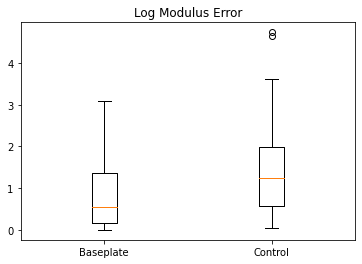

In [9]:
import scipy.stats as stats
import statistics
import numpy as np

baseplate_exp = experiment.Experiment(name="test")
baseplate_exp.set_best_model("experiments/baseplate/best.pt")
baseplate = torch.load("experiments/baseplate/best.pt")

baseplate_scores = []
ctrl_scores = []

print(len(baseplate_exp.test_data))
print(len(baseplate_exp.all_data))

labels = []

for i in range(len(baseplate_exp.all_data)):
    input_tensor, label, w, _ = baseplate_exp.getExample(3, i)
    labels.append(label.item())

# ctrl = np.random.normal(statistics.mean(labels), statistics.stdev(labels), len(labels), )
ctrl = [statistics.mean(labels)] * len(labels)
for i in range(len(baseplate_exp.test_data)):
    input_tensor, label, w, _ = baseplate_exp.getExample(2, i)
    input_tensor = input_tensor.unsqueeze(0)
    actual = baseplate(input_tensor.to(device))
    actual = actual.cpu().detach().numpy()[0][0]
    baseplate_scores.append(abs(label.item()-actual))
    ctrl_scores.append(abs(label.item()-ctrl[i]))
    

fig, ax = plt.subplots()
ax.boxplot([baseplate_scores, ctrl_scores])
ax.set_xticklabels(['Baseplate', 'Control'])
ax.set_title("Log Modulus Error")

print(f"baseplate mean: {statistics.mean(baseplate_scores)}")
print(f"baseplate std: {statistics.stdev(baseplate_scores)}")
print(f"ctrl mean: {statistics.mean(ctrl_scores)}")
print(f"ctrl std: {statistics.stdev(ctrl_scores)}")

stats.ttest_ind(a=baseplate_scores, b=ctrl_scores, equal_var=False)

In [5]:
best_ind = []

for i in range(len(pretrained_exp.test_data)):
    input_tensor, label, w = pretrained_exp.getExample(2, i)
    input_tensor = input_tensor.unsqueeze(0)
    actual = pretrained_model(input_tensor.to(device))
    actual = actual.cpu().detach().numpy()[0][0]
    best_ind.append((i, abs(label.item()-actual)))
for i in range(len(pnipam_exp.test_data)):
    input_tensor, label, w = pnipam_exp.getExample(2, i)
    input_tensor = input_tensor.unsqueeze(0)
    actual = pnipam_model(input_tensor.to(device))
    actual = actual.cpu().detach().numpy()[0][0]
    best_ind[i] = (i, abs(label.item()-actual) - best_ind[i][1])
best_ind.sort(key=lambda x: x[1])
print(best_ind[0:20])


[(59, -0.5649621486663818), (29, -0.4824838638305664), (55, -0.47489356994628906), (50, -0.4391160011291504), (60, -0.42105817794799805), (9, -0.4024815559387207), (14, -0.3922421932220459), (53, -0.3506894111633301), (15, -0.3441758155822754), (71, -0.29076690163265084), (48, -0.269808292388916), (26, -0.26383066177368164), (74, -0.22736496414790963), (75, -0.20864558219909668), (97, -0.19865107536315918), (21, -0.1904761791229248), (66, -0.1853675314391694), (1, -0.18370723724365234), (58, -0.17809438705444336), (12, -0.17755937576293945)]


In [17]:
print(input_tensor.shape)


torch.Size([1, 3, 224, 224])


In [6]:
baseplate_cam = GradCAM(
    model=baseplate, target_layers=baseplate_layers, use_cuda=True)
pnipam_cam = GradCAM(model=pnipam_model,
                     target_layers=pnipam_layers, use_cuda=True)
pretrained_cam = GradCAM(model=pretrained_model,
                         target_layers=pretrained_layers, use_cuda=True)


In [7]:
baseplate_targets = [ClassifierOutputTarget(0)]
pnipam_targets = [ClassifierOutputTarget(0)]
pretrained_targets = [ClassifierOutputTarget(0)]


Text(0.5, 1.0, '\\TeX\\ is Number $\\displaystyle\\sum_{n=1}^\\infty\\frac{-e^{i\\pi}}{2^n}$!')

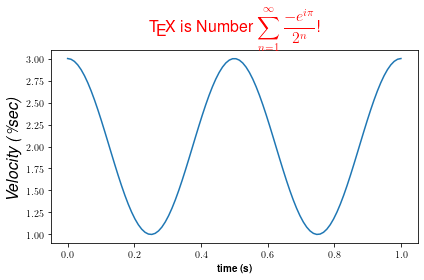

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True


t = np.linspace(0.0, 1.0, 100)
s = np.cos(4 * np.pi * t) + 2

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(t, s)

ax.set_xlabel(r'\textbf{time (s)}')
ax.set_ylabel('\\textit{Velocity (\N{DEGREE SIGN}/sec)}', fontsize=16)
ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
             r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')


In [39]:
import os

for i in range(len(baseplate_exp.test_data)):
    fig = plt.figure(figsize=(3, 13))
    plt.rcParams['text.usetex'] = True
    # sm = plt.cm.ScalarMappable(cmap=plt.cm.get_cmap('jet'))
    # sm.set_clim(vmin=0, vmax=100)
    # plt.colorbar(sm)
    input_tensor, label, w, path = baseplate_exp.getExample(2, i)
    filename, ext = os.path.splitext(os.path.basename(path))

    fig.suptitle(filename.split()[0], fontsize=25)
    fig.tight_layout()
    fig.subplots_adjust(top=0.93)

    input_tensor = input_tensor.unsqueeze(0)
    actual = baseplate(input_tensor.to(device))
    grayscale_cam = baseplate_cam(
        input_tensor=input_tensor, targets=baseplate_targets)

    # In this example grayscale_cam has only one image in the batch:
    grayscale_cam = grayscale_cam[0, :]

    fig.add_subplot(4, 1, 1)
    plt.axis('off')
    plt.imshow(input_tensor.cpu().detach().numpy()[0].transpose(1, 2, 0))

    # Adds a subplot at the 1st position
    fig.add_subplot(4, 1, 2)
    plt.axis('off')
    actual_label = actual.cpu().detach().numpy()[0][0]
#     plt.gca().set_title(f"Baseplate \n Actual: {label:.4f} logPa, predicted: {actual_label:.4f} logPa")

    visualization = show_cam_on_image(img=input_tensor.squeeze(
        0).permute(1, 2, 0).numpy(), mask=grayscale_cam, use_rgb=True)
    plt.imshow(visualization)
    plt.text(0.5, -0.1, fr'$\Delta E={abs(actual_label-label):.4f}$', size=15, ha="center",
             transform=plt.gca().transAxes)

    input_tensor, label, w, path = pretrained_exp.getExample(2, i)
    input_tensor = input_tensor.unsqueeze(0)
    actual = pretrained_model(input_tensor.to(device))
    grayscale_cam = pretrained_cam(
        input_tensor=input_tensor, targets=pretrained_targets)

    # In this example grayscale_cam has only one image in the batch:
    grayscale_cam = grayscale_cam[0, :]

    # Adds a subplot at the 1st position
    fig.add_subplot(4, 1, 4)
    plt.axis('off')
    actual_label = actual.cpu().detach().numpy()[0][0]
#     plt.gca().set_title(f"Pretrained \n Actual: {label:.4f} logPa, predicted: {actual.cpu().detach().numpy()[0][0]:.4f} logPa")

    visualization = show_cam_on_image(img=input_tensor.squeeze(
        0).permute(1, 2, 0).numpy(), mask=grayscale_cam, use_rgb=True)
    plt.imshow(visualization)
    plt.text(0.5, -0.1, fr'$\Delta E={abs(actual_label-label):.4f}$', size=15, ha="center",
             transform=plt.gca().transAxes)
    input_tensor, label, w, path = pnipam_exp.getExample(2, i)
    input_tensor = input_tensor.unsqueeze(0)
    actual = pnipam_model(input_tensor.to(device))
    grayscale_cam = pnipam_cam(
        input_tensor=input_tensor, targets=pnipam_targets)

    # In this example grayscale_cam has only one image in the batch:
    grayscale_cam = grayscale_cam[0, :]

    # Adds a subplot at the 1st position
    fig.add_subplot(4, 1, 3)
    plt.axis('off')
    actual_label = actual.cpu().detach().numpy()[0][0]

    # plt.gca().set_title(f"PNIPAM \n Actual: {label:.4f} logPa, predicted: {actual.cpu().detach().numpy()[0][0]:.4f} logPa")

    visualization = show_cam_on_image(img=input_tensor.squeeze(
        0).permute(1, 2, 0).numpy(), mask=grayscale_cam, use_rgb=True)
    img = plt.imshow(visualization)
    plt.text(0.5, -0.1, fr'$\Delta E={abs(actual_label-label):.4f}$', size=15, ha="center",
             transform=plt.gca().transAxes)
    plt.savefig(f"figs/rotate/{filename}.png")
    plt.close()


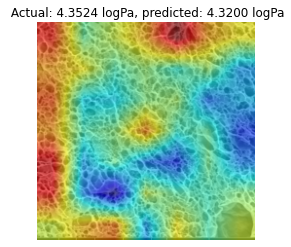

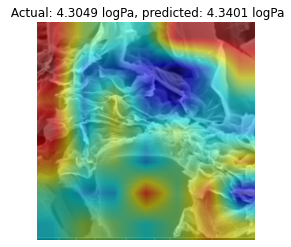

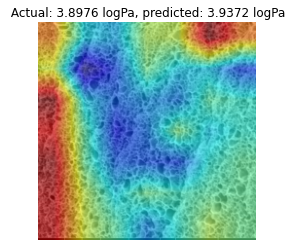

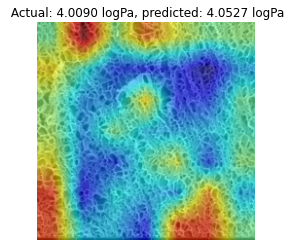

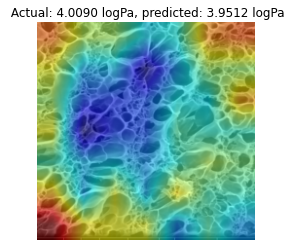

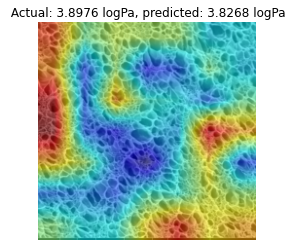

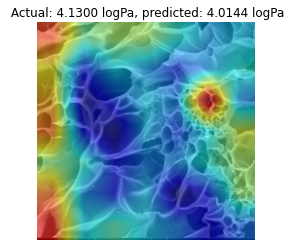

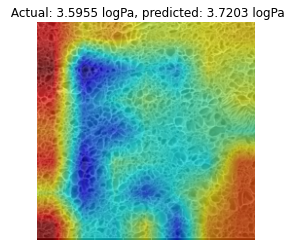

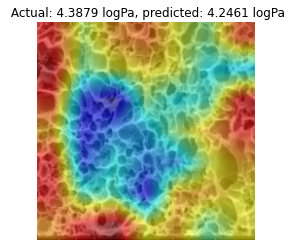

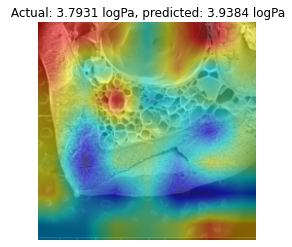

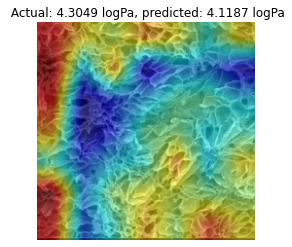

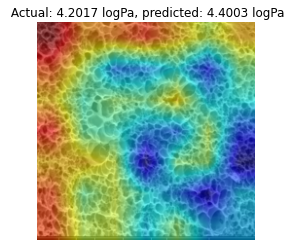

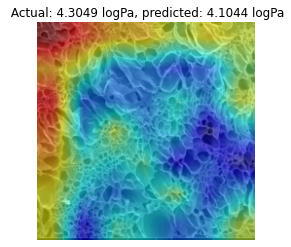

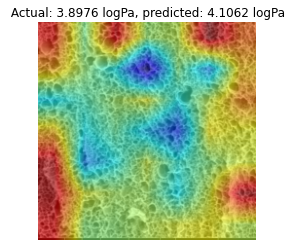

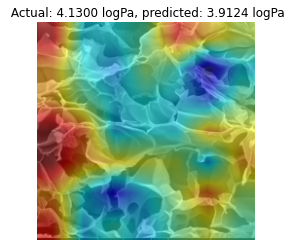

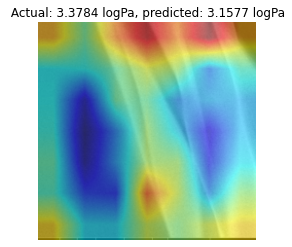

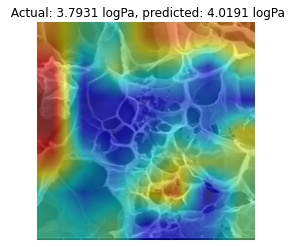

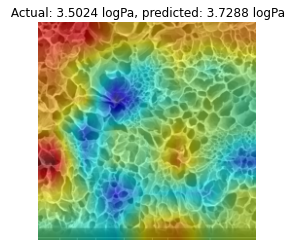

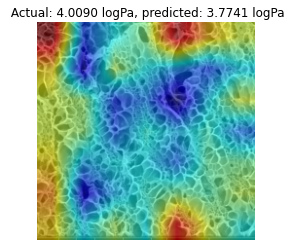

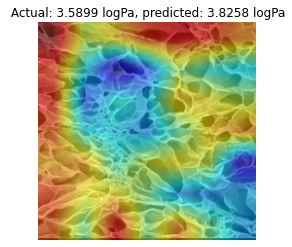

In [9]:
for i, j in best_ind[0:20]:

    input_tensor, label, w = test_exp.getExample(2, i)
    input_tensor = input_tensor.unsqueeze(0)
    actual = model(input_tensor.to(device))
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

    # In this example grayscale_cam has only one image in the batch:
    grayscale_cam = grayscale_cam[0, :]
    plt.figure()
    plt.axis('off')
    plt.gca().set_title(
        f" Actual: {label:.4f} logPa, predicted: {actual.cpu().detach().numpy()[0][0]:.4f} logPa")

    visualization = show_cam_on_image(img=input_tensor.squeeze(
        0).permute(1, 2, 0).numpy(), mask=grayscale_cam, use_rgb=True)
    plt.imshow(visualization)


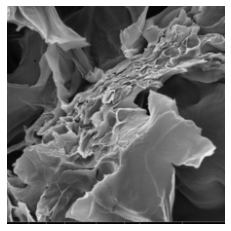

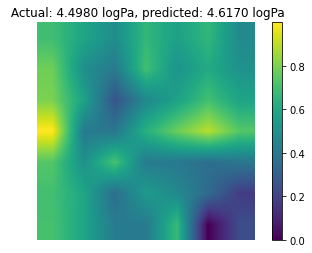

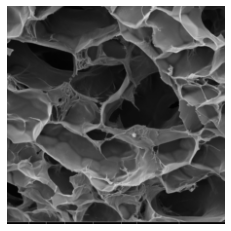

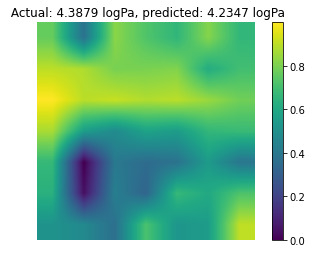

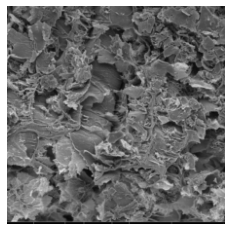

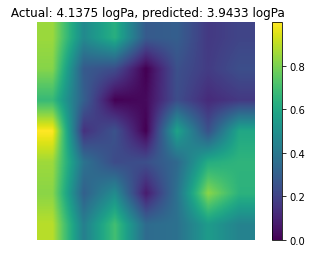

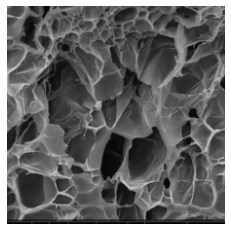

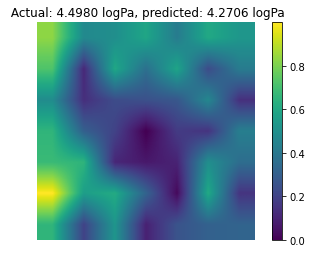

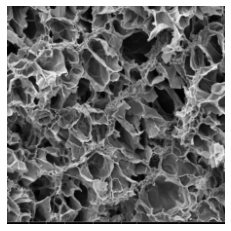

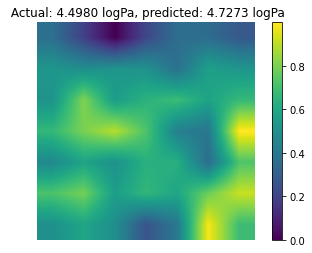

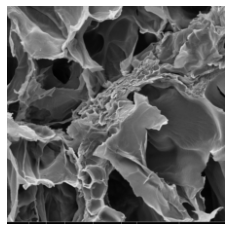

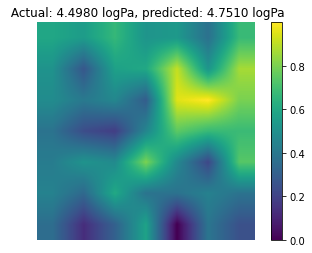

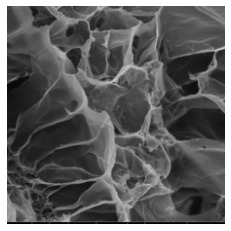

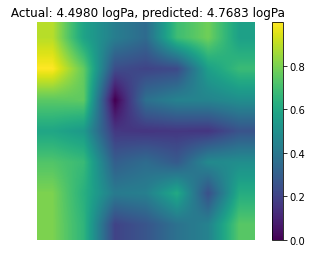

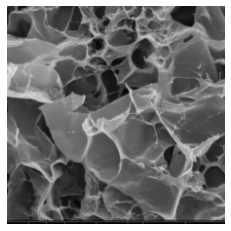

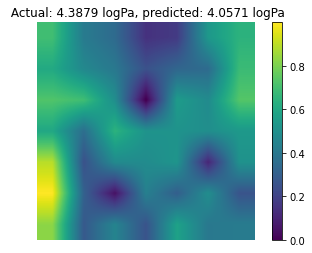

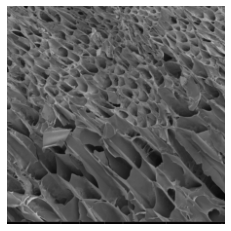

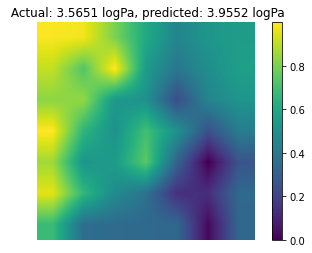

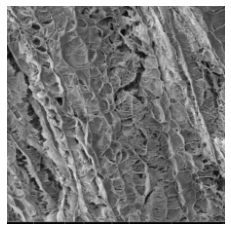

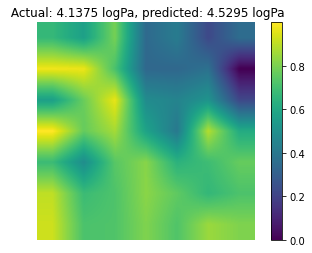

In [53]:
for i, j in best_ind[0:10]:

    input_tensor, label, w = test_exp.getExample(2, i)
    input_tensor = input_tensor.unsqueeze(0)
    actual = model(input_tensor.to(device))
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

    # In this example grayscale_cam has only one image in the batch:
    grayscale_cam = grayscale_cam[0, :]
    plt.figure()
    plt.imshow(input_tensor.squeeze().permute(1, 2, 0))
    plt.axis('off')
    plt.figure()
    plt.gca().set_title(
        f" Actual: {label:.4f} logPa, predicted: {actual.cpu().detach().numpy()[0][0]:.4f} logPa")
    plt.imshow(grayscale_cam)
    plt.colorbar()
    plt.axis('off')
# visualization = show_cam_on_image(input_tensor.squeeze(0), grayscale_cam, use_rgb=True)


(-0.5, 223.5, 223.5, -0.5)

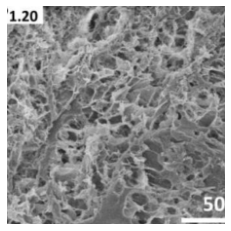

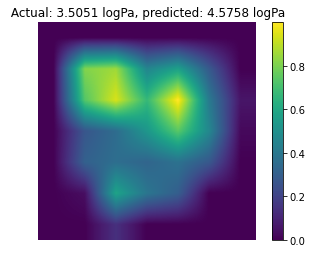

In [22]:
eigencam = EigenCAM(model=model, target_layers=target_layers, use_cuda=True)
targets = [ClassifierOutputTarget(0)]
grayscale_cam = eigencam(input_tensor=input_tensor, targets=targets)

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
plt.figure(1)
plt.imshow(input_tensor.squeeze().permute(1, 2, 0))
plt.axis('off')
plt.figure(2)
plt.gca().set_title(
    f" Actual: {label:.4f} logPa, predicted: {actual.cpu().detach().numpy()[0][0]:.4f} logPa")
plt.imshow(grayscale_cam)
plt.colorbar()
plt.axis('off')
# visualization = show_cam_on_image(input_tensor.squeeze(0), grayscale_cam, use_rgb=True)
